In [334]:
from utility import *
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime


# Einlesen der Ruckprojektionen

In [161]:
filtered = load_matrix('../messungen/oliTOM1/Results/Matrix_reco.txt')
unfiltered = load_matrix('../messungen/oliTOM1/Results/Matrix_unfiltered.txt')

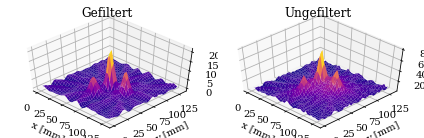

In [325]:
fig = plt.figure()
plot_reconstruction(filtered, fig=fig, subplot=121, title='Gefiltert')
plot_reconstruction(unfiltered, save=('3dplot', 'tom1', (6, 2)), fig=fig, subplot=122, title='Ungefiltert')
fig.tight_layout()

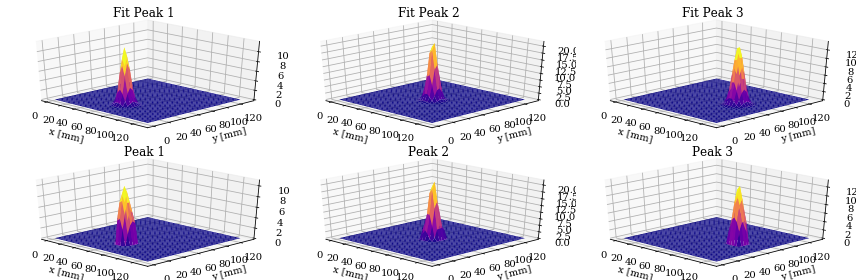

In [330]:
peaks = find_peak_positions(filtered, save=('filtered_fit', 'tom1'))

[([50.17388514220538, 65.68908198786471, 36.93627963994932, 4.650969229553721],
  [0.6505252591427874,
   0.060298800686361356,
   0.060298769274691306,
   0.042637675284470856]),
 ([39.304159661459444,
   79.31346233940788,
   66.51806573625299,
   -12.180797677677088],
  [1.2865802111592206,
   0.39869931030584704,
   0.39869930573273576,
   0.28192301086177374])]

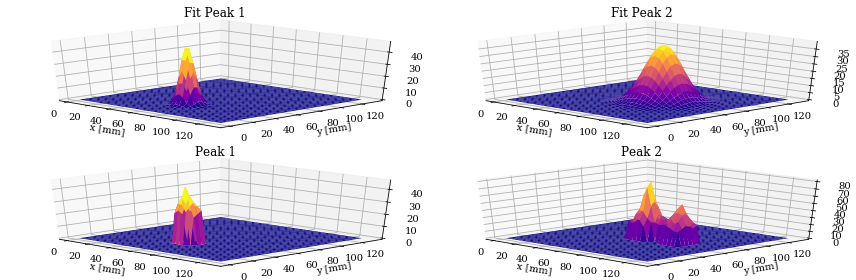

In [326]:
find_peak_positions(unfiltered, save=('unfiltered_fit', 'tom1'))

In [333]:
print(peaks_to_table(peaks))

Peak 1 & 11.89 & 0.1 & 65.604 & 0.04 & 35.972 & 0.04 & 4.664 & 0.028 \\
Peak 2 & 22.49 & 0.11 & 67.971 & 0.022 & 64.842 & 0.022 & 4.639 & 0.016 \\
Peak 3 & 14.24 & 0.16 & 94.68 & 0.06 & 65.9 & 0.06 & 5.22 & 0.04 \\



In [343]:
t0 = datetime(2010, 2, 1)
dt = (datetime(2020, 1, 10) - t0).total_seconds()  # s
a = 270  # kBq
da = .03*a  # kBq
a_now = SecondaryValue('A*(1/2)**(t/hl)')(A=(a, da), t=dt, hl=(82.1e6, 31557600*.001))  # kBq

In [374]:
a_now

(19.115801602937395, 5.734773484911521)

In [380]:
scientific_round(*a_now)

(19, 6)

In [357]:
amplitudes = np.array([peaks[0][0][0], peaks[1][0][0], peaks[2][0][0]])
d_amplitudes = np.array([peaks[0][1][0], peaks[1][1][0], peaks[2][1][0]])
rel_amps = amplitudes / amplitudes[2]
d_rel_amps = d_amplitudes / amplitudes[2]

In [385]:
akt = SecondaryValue('a/a3*akt', defaults=dict(akt=a_now, a3=(amplitudes[2], d_amplitudes[2])))
akts = akt(a=(amplitudes, d_amplitudes))
print(peaks_to_table(zip(*akts)))

Peak 0 & 16.0 & 5.0 \\
Peak 1 & 30.0 & 9.0 \\
Peak 2 & 19.0 & 6.0 \\



In [386]:
6/19 * 100

31.57894736842105